# Capstone project - HealthCare Fraud Detection - EDA and Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cp_clean_helper import show_values
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading cleaned training and testing datasets and fraud labels:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
fraud_labels = pd.read_csv("Data/Train-1542865627584.csv")

### # Looking at dataset shapes:-

In [3]:
print('Shape of fraud labels data :',fraud_labels.shape)
print('Shape of train data :',train_df.shape)
print('Shape of test data :',test_df.shape)

Shape of fraud labels data : (5410, 2)
Shape of train data : (558211, 59)
Shape of test data : (135392, 58)


### # Looking at first few rows for each:

In [4]:
train_df.head(5)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,PotentialFraud
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,70,0,66,36060,3264,1943,1,1,CLM46614,PRV55912,26000,53276,0,0,3022,1068.0,154,1036,1770,2273,2981,538,2034,442,197,1357,1041,1117,300,154,6,6,2009,4,96.05,27068.0,3,1,1,Yes
1,BENE12511,0,0,0,39,510,12,12,1,1,1,1,1,1,0,0,0,1,1,90,0,65,1250,1250,1944,9,1,CLM724430,PRV55912,600,73124,0,0,3763,0.0,736,10069,4945,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,12,100.00,600.0,6,2,2,Yes
2,BENE14577,1,0,1,33,70,12,12,1,0,0,1,1,1,1,0,1,1,0,440,0,74,2390,2390,1935,10,1,CLM567180,PRV55912,20,47058,0,0,3763,0.0,736,202,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,9,100.00,20.0,6,2,2,Yes
3,BENE15074,1,0,0,39,470,12,12,0,1,0,1,1,1,0,0,1,1,1,210,0,77,870,870,1932,6,1,CLM259984,PRV55912,30,40279,0,31218,3763,0.0,736,10379,1781,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,3,100.00,30.0,3,1,1,Yes
4,BENE16973,0,0,0,39,310,12,12,0,0,0,1,1,1,1,0,1,1,1,200,0,77,24450,2586,1932,5,1,CLM565430,PRV55912,50,36530,4694,0,3763,0.0,736,10274,2335,3352,1507,3351,2402,2443,304,1629,1041,1117,300,154,-1,0,2009,9,100.00,50.0,9,3,3,Yes


In [5]:
test_df.head(5)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,70,0,66,36060,3264,1943,1,1,CLM392397,PRV55962,30,6381,0,3608,2418,0.0,712,8039,3452,417,605,2378,692,1690,1566,1383,435,659,170,68,-1,0,2009,6,100.0,30.0,3,1,1
1,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,70,0,66,36060,3264,1943,1,1,CLM430760,PRV56112,30,12407,0,6949,2418,0.0,712,7178,3082,995,2453,2155,1895,1690,1566,1383,435,659,170,68,-1,0,2009,6,100.0,30.0,3,1,1
2,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,160,1,69,1490,1490,1940,9,1,CLM233081,PRV56979,200,20041,0,11230,2418,0.0,712,5324,3154,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,-1,0,2009,3,100.0,200.0,3,1,1
3,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,160,1,69,1490,1490,1940,9,1,CLM496381,PRV56573,10,14401,2703,0,1408,0.0,712,4215,389,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,-1,0,2009,7,100.0,10.0,15,5,5
4,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,160,1,69,1490,1490,1940,9,1,CLM521391,PRV56573,10,18681,0,6974,2418,0.0,712,8153,3154,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,-1,0,2009,8,100.0,10.0,3,1,1


In [6]:
fraud_labels.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


## # Additional EDA:

- Looking at percentages of fraud vs non-fraud providers in the training dataset

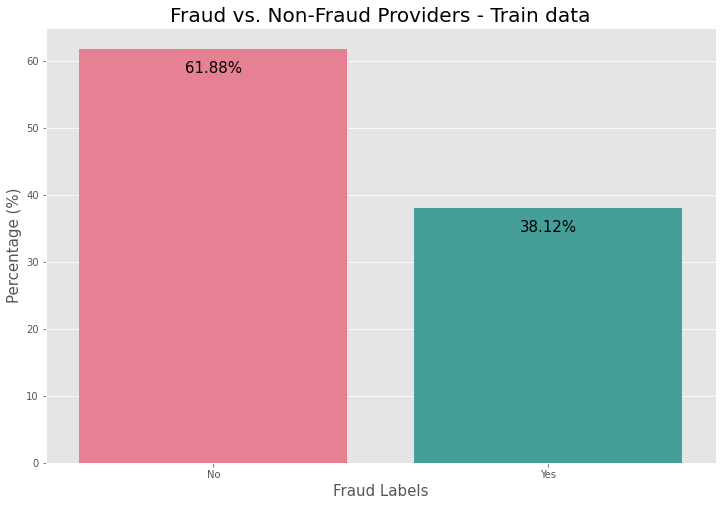

In [7]:
#  Creating df to show percentages of fraud vs non-fraud providers in the dataset:
fraud_df = pd.DataFrame(train_df['PotentialFraud'].value_counts(normalize=True)*100).reset_index()
fraud_df.columns=['Fraud_Labels', 'Per_data']

# Graphically presenting the results
plt.figure(figsize = (12,8))
splot = sns.barplot(x="Fraud_Labels", y="Per_data", data=fraud_df, palette='husl')
for p in splot.patches:
    splot.annotate(format(str(p.get_height().round(2)) + '%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Fraud Labels", fontsize = 15)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers - Train data", fontsize = 20)
plt.show()

## Beneficiary focused EDA:

### Looking at chronic conditions for inpatient and outpatient beneficiary claims:

In [8]:
# Creating inpatient subset

inp_df = train_df.loc[train_df.Hospital_Stay >= 0,:]

# Counting all chronic conditions

inp_df['Chr_Cond_Count'] = inp_df['RenalDiseaseIndicator'] + inp_df['ChronicCond_Heartfailure'] + inp_df['ChronicCond_KidneyDisease'] +\
                           inp_df['ChronicCond_Cancer'] + inp_df['ChronicCond_ObstrPulmonary'] + inp_df['ChronicCond_Alzheimer'] +\
                           inp_df['ChronicCond_Depression'] + inp_df['ChronicCond_Diabetes'] + inp_df['ChronicCond_IschemicHeart'] +\
                           inp_df['ChronicCond_Osteoporasis'] + inp_df['ChronicCond_rheumatoidarthritis'] + inp_df['ChronicCond_stroke']

# Looking at mean and median

print(inp_df[['Chr_Cond_Count']].mean())
print(inp_df[['Chr_Cond_Count']].median())

Chr_Cond_Count    5.719771
dtype: float64
Chr_Cond_Count    6.0
dtype: float64


In [9]:
# Creating outpatient subset

out_df = train_df.loc[train_df.Hospital_Stay == -1,:]

# Counting all chronic conditions

out_df['Chr_Cond_Count'] = out_df['RenalDiseaseIndicator'] + out_df['ChronicCond_Heartfailure'] + out_df['ChronicCond_KidneyDisease'] +\
                           out_df['ChronicCond_Cancer'] + out_df['ChronicCond_ObstrPulmonary'] + out_df['ChronicCond_Alzheimer'] +\
                           out_df['ChronicCond_Depression'] + out_df['ChronicCond_Diabetes'] + out_df['ChronicCond_IschemicHeart'] +\
                           out_df['ChronicCond_Osteoporasis'] + out_df['ChronicCond_rheumatoidarthritis'] + out_df['ChronicCond_stroke']

# Looking at mean and median

print(out_df[['Chr_Cond_Count']].mean())
print(out_df[['Chr_Cond_Count']].median())

Chr_Cond_Count    6.774656
dtype: float64
Chr_Cond_Count    7.0
dtype: float64


- Looks like outpatient beneficiaries have slightly higher condition counts

### Looking at visit counts per beneficiary in inpatient/outpatient datasets

In [10]:
inp_df[['BeneID','ClaimID','Chr_Cond_Count']].groupby('BeneID')

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,PotentialFraud,Chr_Cond_Count
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,70,0,66,36060,3264,1943,1,1,CLM46614,PRV55912,26000,53276,0,0,3022,1068.0,154,1036,1770,2273,2981,538,2034,442,197,1357,1041,1117,300,154,6,6,2009,4,96.05,27068.0,3,1,1,Yes,4
5,BENE17521,1,0,0,39,230,12,12,0,0,0,1,0,1,1,0,1,1,1,20,0,96,19100,1168,1913,12,1,CLM34721,PRV55912,19000,25561,17243,19853,1718,1068.0,730,4019,700,809,1399,1511,537,1639,393,2396,1041,685,174,154,12,12,2009,1,94.68,20068.0,3,1,1,Yes,6
8,BENE21718,0,0,0,39,600,12,12,1,1,1,1,1,1,1,0,0,1,1,540,0,87,18050,2118,1922,10,1,CLM72336,PRV55912,17000,15819,6884,0,3963,1068.0,702,10082,1850,3007,2949,2855,2506,2021,1091,827,1041,1006,300,154,18,18,2009,10,94.09,18068.0,3,1,1,Yes,9
9,BENE22934,1,0,0,39,280,12,12,1,0,1,1,0,1,0,0,0,0,1,160,0,79,27450,2586,1930,7,1,CLM73394,PRV55912,13000,53067,3669,19853,2623,1068.0,399,6098,3180,1524,3951,1303,362,474,2720,2453,1041,805,300,154,4,4,2009,10,92.41,14068.0,6,2,2,Yes,5
10,BENE24402,1,1,0,39,510,12,12,0,1,1,0,1,1,1,0,1,1,1,740,0,84,11900,9968,1925,9,1,CLM32911,PRV55912,3000,46155,34863,0,253,1068.0,459,1562,4704,4206,3866,3502,3187,2991,2720,2453,1041,877,300,154,4,4,2009,1,73.75,4068.0,3,1,1,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558191,BENE149280,1,0,1,23,240,12,12,0,0,0,0,0,0,0,0,0,0,1,560,0,83,17810,4946,1926,7,1,CLM68702,PRV54054,5000,63230,0,0,1830,1068.0,136,4432,5090,1981,182,1011,461,3267,377,2022,1041,1117,300,154,5,5,2009,9,82.40,6068.0,0,0,0,No,2
558196,BENE151892,0,0,0,2,20,12,12,1,1,1,1,1,1,0,0,1,1,1,220,0,71,20400,1468,1938,7,1,CLM31767,PRV51136,20000,33904,14692,0,2768,1068.0,244,4215,5090,527,3162,1283,1087,472,2900,913,1041,210,80,154,2,2,2008,12,94.93,21068.0,0,0,0,No,9
558203,BENE154375,0,0,1,7,30,12,12,1,0,0,1,1,1,0,0,1,0,1,3930,0,74,36090,14874,1935,11,1,CLM39644,PRV51977,8000,8141,11151,0,1655,1068.0,246,4170,1940,514,2427,1893,1767,1801,2512,249,1041,269,300,154,3,3,2009,2,88.22,9068.0,0,0,0,No,7
558205,BENE156181,0,0,1,37,260,12,12,0,0,0,0,1,1,0,0,1,0,0,320,0,57,20740,2876,1952,3,1,CLM57017,PRV55706,12000,5710,2446,35140,2952,1068.0,701,7121,2072,4313,1441,408,603,2346,192,35,1041,1104,300,154,7,7,2009,6,91.83,13068.0,0,0,0,No,4


In [11]:
out_df

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,OPAnnualDeductibleAmt,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,PotentialFraud,Chr_Cond_Count
1,BENE12511,0,0,0,39,510,12,12,1,1,1,1,1,1,0,0,0,1,1,90,0,65,1250,1250,1944,9,1,CLM724430,PRV55912,600,73124,0,0,3763,0.0,736,10069,4945,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,12,100.0,600.0,6,2,2,Yes,8
2,BENE14577,1,0,1,33,70,12,12,1,0,0,1,1,1,1,0,1,1,0,440,0,74,2390,2390,1935,10,1,CLM567180,PRV55912,20,47058,0,0,3763,0.0,736,202,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,9,100.0,20.0,6,2,2,Yes,8
3,BENE15074,1,0,0,39,470,12,12,0,1,0,1,1,1,0,0,1,1,1,210,0,77,870,870,1932,6,1,CLM259984,PRV55912,30,40279,0,31218,3763,0.0,736,10379,1781,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,3,100.0,30.0,3,1,1,Yes,7
4,BENE16973,0,0,0,39,310,12,12,0,0,0,1,1,1,1,0,1,1,1,200,0,77,24450,2586,1932,5,1,CLM565430,PRV55912,50,36530,4694,0,3763,0.0,736,10274,2335,3352,1507,3351,2402,2443,304,1629,1041,1117,300,154,-1,0,2009,9,100.0,50.0,9,3,3,Yes,7
6,BENE17795,1,0,0,39,320,12,12,1,0,1,1,0,0,0,0,1,0,1,160,0,69,1870,1870,1940,5,1,CLM691058,PRV55912,60,28561,0,16792,3763,0.0,736,4135,4823,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,20,2009,11,100.0,60.0,18,6,6,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558204,BENE154687,0,1,0,25,150,12,12,0,1,0,1,1,1,0,0,1,0,1,220,0,82,4400,4400,1927,5,1,CLM184358,PRV54302,3300,43403,18819,0,3685,0.0,736,9341,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,2,100.0,3300.0,0,0,0,No,6
558206,BENE157252,0,0,0,21,230,12,12,1,1,0,0,0,1,0,0,1,1,1,400,0,67,17540,3608,1942,1,1,CLM603185,PRV57762,1900,81112,0,0,253,0.0,736,1562,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,9,100.0,1900.0,0,0,0,No,6
558207,BENE157378,1,0,1,5,200,12,12,0,0,0,1,0,1,0,0,1,1,1,2810,0,63,14240,14240,1946,6,1,CLM460770,PRV51577,2100,18069,0,0,3763,0.0,736,5148,3779,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,20,2009,7,100.0,2100.0,0,0,0,No,6
558208,BENE158295,1,0,0,16,490,12,12,1,0,0,0,0,0,0,0,0,0,1,350,0,85,640,640,1924,8,1,CLM306999,PRV53083,10,70375,0,0,3763,0.0,736,4066,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,-1,0,2009,4,100.0,10.0,0,0,0,No,2
